In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
from colour import wavelength_to_XYZ

In [2]:
from chromalab.observer import Observer, Cone, getsRGBfromWavelength, transformToDisplayChromaticity, getHeringMatrix
from chromalab.spectra import Spectra, Illuminant
from chromalab.maxbasis import MaxBasis
from chromalab.maxdisplaybasis import *
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay, easeFunction
from chromalab.animation import Animation

objc[36662]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b7b52e28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d58f66f0). One of the two will be used. Which one is undefined.
objc[36662]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b7b52db0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d58f6718). One of the two will be used. Which one is undefined.
objc[36662]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b7b52e50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

## Create the Cone Fundamentals in 4D

In [4]:
wavelengths = np.arange(400, 700, 5)
d65 = Illuminant.get("D65")
leds = [660, 550, 451, 590, 510, 410]

In [5]:
tetrachromat = Observer.tetrachromat(wavelengths=wavelengths, verbose=True) 
maxbasis = MaxBasis(tetrachromat, verbose=True)

trichromat = Observer.trichromat(wavelengths=wavelengths) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)

100%|██████████| 57/57 [00:00<00:00, 251.26it/s]


Max Primaries -- (415, 520, 695)
Max Volume = 0.08373905185398012
(60, 2)
Volume Ratio Between n primaries / ideal = 0.9016369802652439


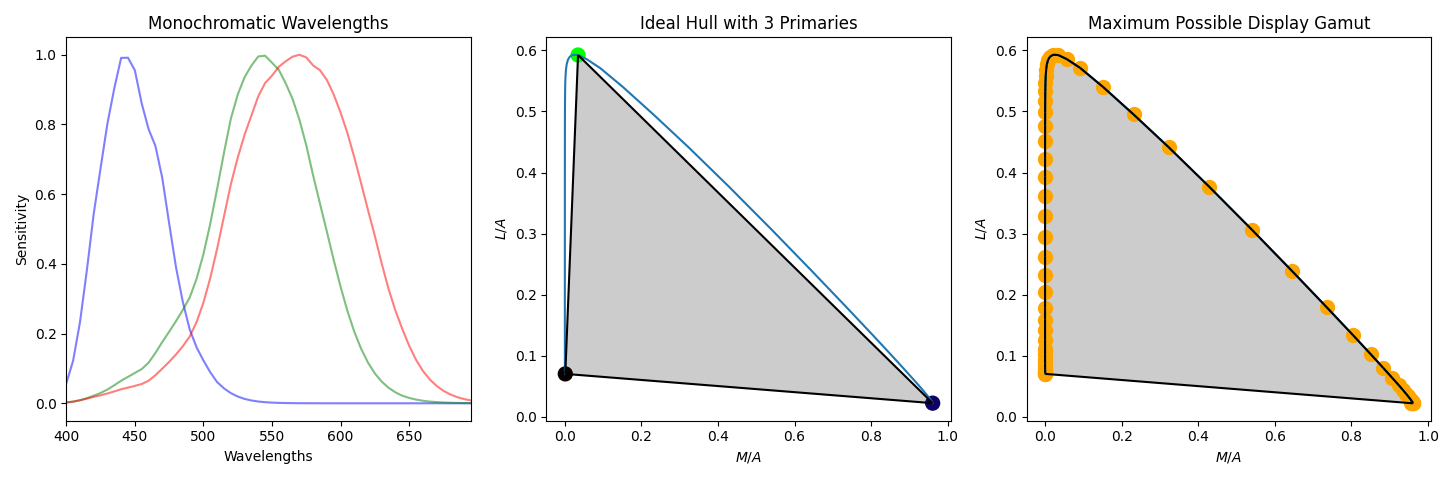

In [6]:
mdb = TriDisplayGamut(trichromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis, projection_idxs=[0, 1])
mdb.computeMaxPrimariesInChrom()
mdb.displayPrimariesInChromDiagram(title="Ideal Hull with 3 Primaries")

Max Primaries -- (415, 520, 695)
Max Volume = 0.08373905185398012
(60, 2)
Volume Ratio Between n primaries / ideal = 0.9016369802652444


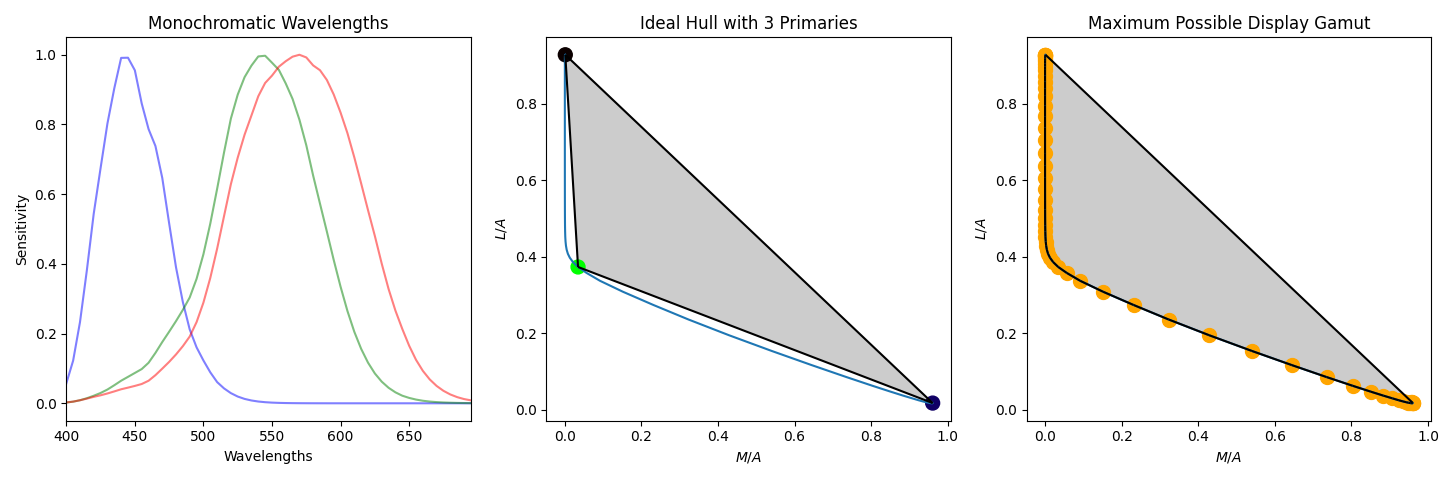

In [7]:
mdb = TriDisplayGamut(trichromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis, projection_idxs=[0, 2])
mdb.computeMaxPrimariesInChrom()
mdb.displayPrimariesInChromDiagram(title="Ideal Hull with 3 Primaries")

Max Primaries -- (415, 520, 695)
Max Volume = 0.0837390518539801
(60, 2)
Volume Ratio Between n primaries / ideal = 0.9016369802652439


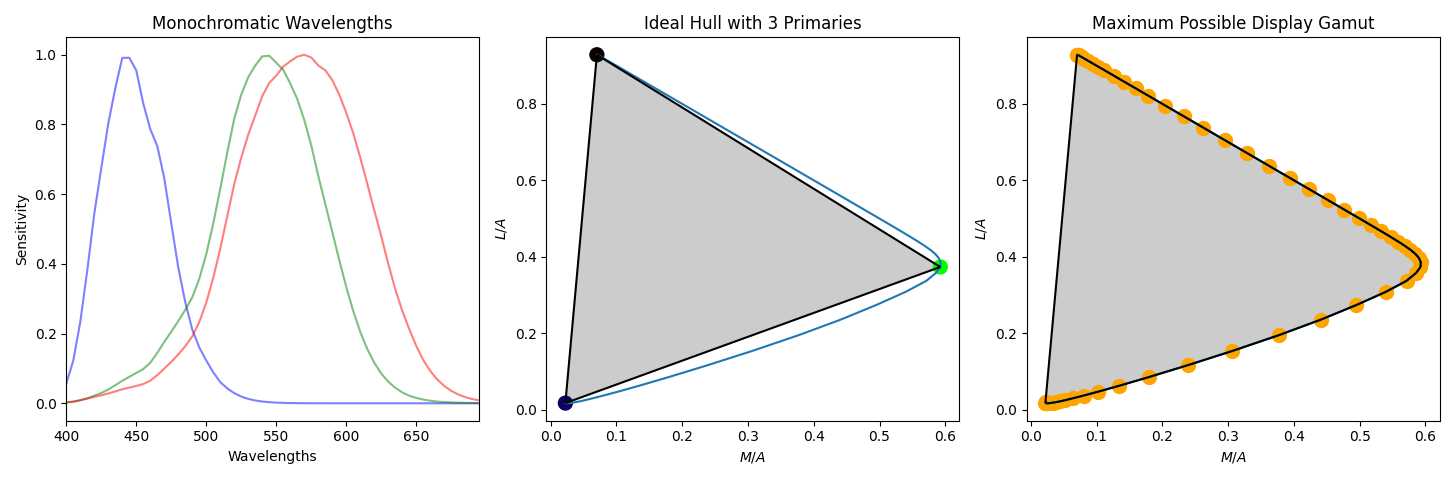

In [15]:
mdb = TriDisplayGamut(trichromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis, projection_idxs=[1, 2])
mdb.computeMaxPrimariesInChrom()
mdb.displayPrimariesInChromDiagram(title="Ideal Hull with 3 Primaries")

Max Primaries -- (415.0, 520.0, 610.0, 695.0)
Max Volume = 0.0011954535466257164
Volume Ratio Between n primaries / ideal = 0.6569824762477787


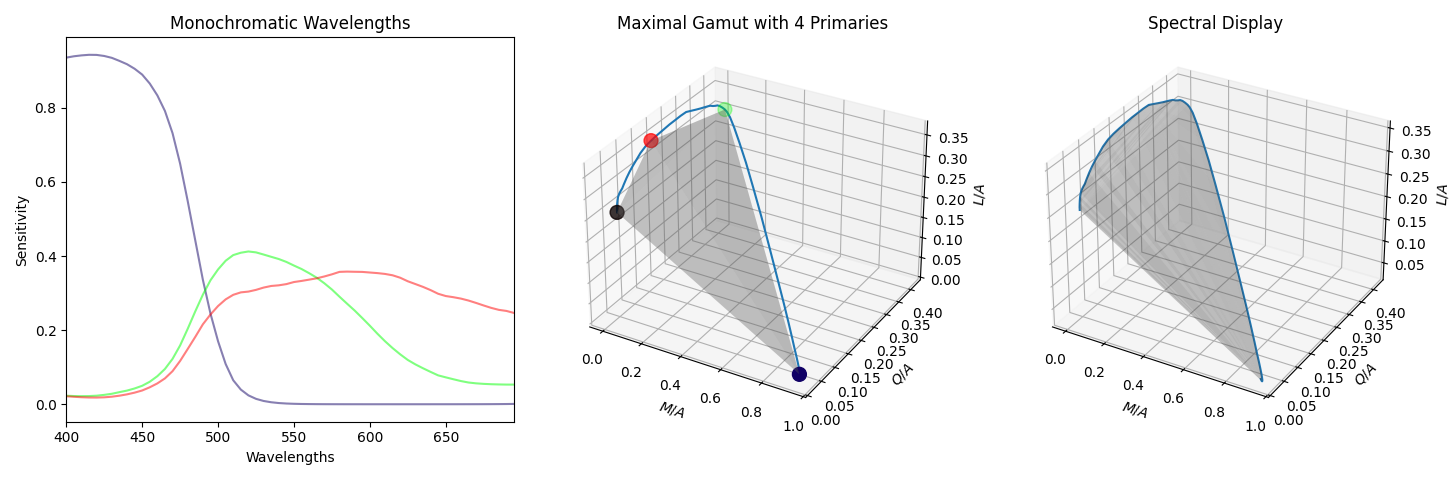

In [16]:
mdb1 = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis, projection_idxs=[0, 1, 2])
mdb1.computeMaxPrimariesInChrom()
mdb1.displayPrimariesInChromDiagram(title="Maximal Gamut with 4 Primaries")

Max Primaries -- (415.0, 520.0, 610.0, 695.0)
Max Volume = 0.0011954535466257184
Volume Ratio Between n primaries / ideal = 0.6569824762477801


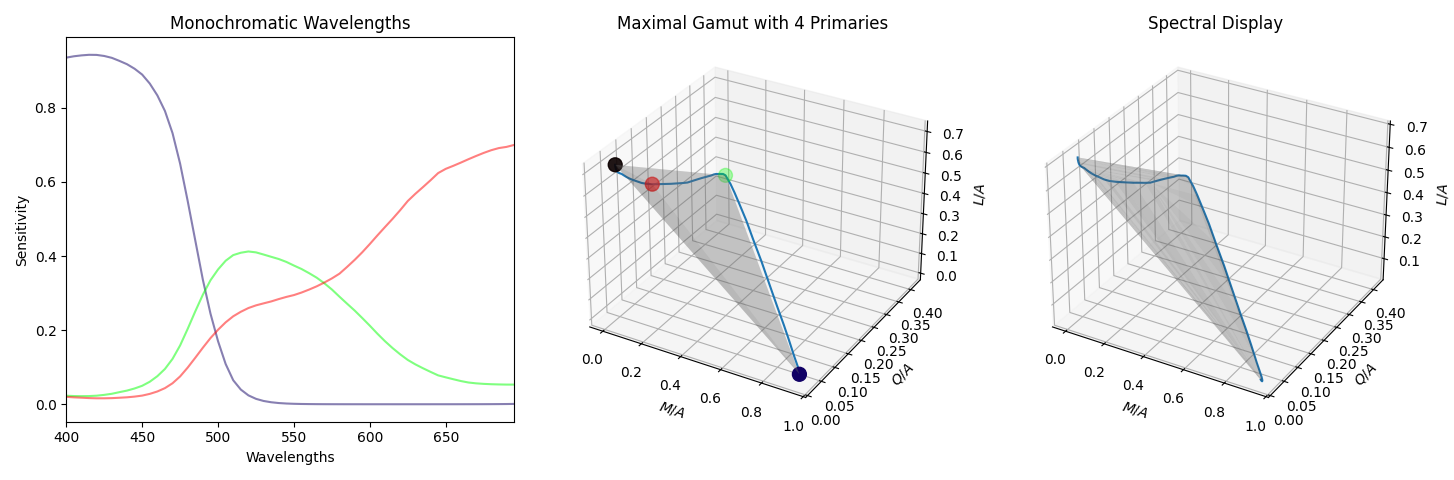

In [17]:
mdb1 = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis, projection_idxs=[0, 1, 3])
mdb1.computeMaxPrimariesInChrom()
mdb1.displayPrimariesInChromDiagram(title="Maximal Gamut with 4 Primaries")

Max Primaries -- (415.0, 520.0, 610.0, 695.0)
Max Volume = 0.0011954535466257164
Volume Ratio Between n primaries / ideal = 0.6569824762477803


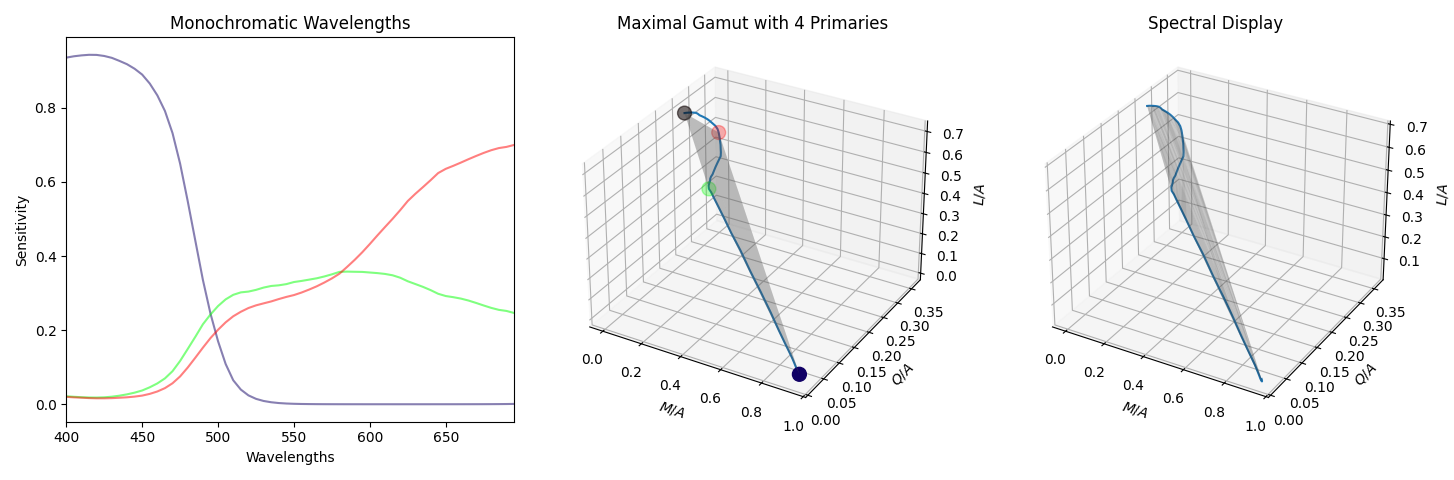

In [18]:
mdb1 = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis, projection_idxs=[0, 2, 3])
mdb1.computeMaxPrimariesInChrom()
mdb1.displayPrimariesInChromDiagram(title="Maximal Gamut with 4 Primaries")

Max Primaries -- (415.0, 520.0, 610.0, 695.0)
Max Volume = 0.0011954535466257175
Volume Ratio Between n primaries / ideal = 0.6569824762477792


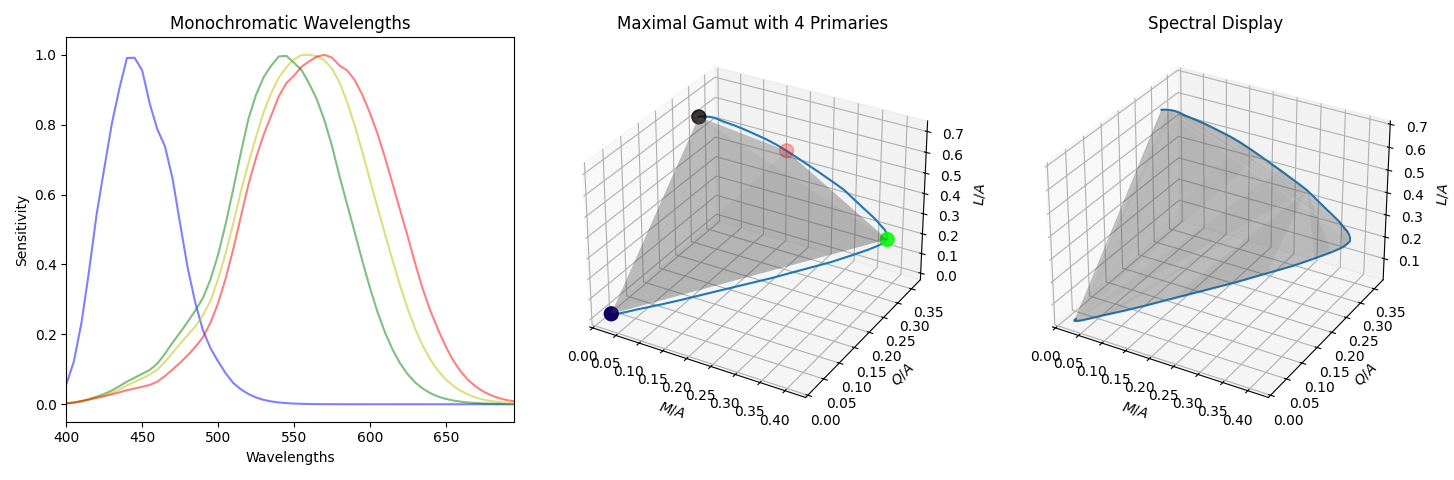

In [12]:
mdb1 = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis, projection_idxs=[1, 2, 3])
mdb1.computeMaxPrimariesInChrom()
mdb1.displayPrimariesInChromDiagram(title="Maximal Gamut with 4 Primaries")